## ALS example

In [97]:
#%load_ext watermark
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
import os
import sys
import numpy as np
import pandas as pd
import scipy as sp
from subprocess import call
from pybpr import *
import matplotlib.pyplot as plt

In [115]:
cf = cf_basic
#df = load_movielens_data('ml-10M100K') # this takes time
df = load_movielens_data('ml-1m')
dfshort = df[df['rating'] > 2]
cf = RecommenderSetup(
    users = dfshort['user_id'], 
    items = dfshort['item_id'],
    timestamps = dfshort['timestamp'],
    min_user_interactions=10,
    min_item_interactions=10
)
cf.generate_train_test(
    user_test_ratio=0.25,
    seed=1234
)

In [116]:
cf.get_memory_usage()

Pandas df = 9.87 MB
Sparse User-Item matrix = 0.8 MB


In [117]:
cf.df

,User,Item,Timestamp
0,1,1193,978300760
1,1,661,978302109
2,1,914,978301968
3,1,3408,978300275
4,1,2355,978824291
...,...,...,...
834114,6040,1090,956715518
834115,6040,1094,956704887
834116,6040,562,956704746
834117,6040,1096,956715648


In [119]:
cf.R_train

<6039x3628 sparse matrix of type '<class 'numpy.int8'>'
	with 623316 stored elements in Compressed Sparse Row format>

In [120]:
als = ALS(
    num_features = 20,
    num_users = cf.R.shape[0],
    num_items = cf.R.shape[1],
    reg_lambda=0.02
)
als.fit(cf.R_train, cf.R_test, num_iters=10)

In [129]:
%%timeit
#als.fit(cf.R_train, cf.R_test, num_iters=20)
#als.fit(cf.R_train, num_iters=50, store_mse=False)
als.fit(cf.R_train, num_iters=50, store_mse=True)

3.4 s ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


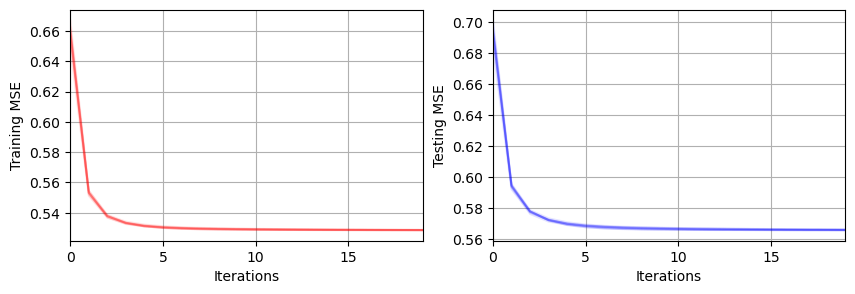

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
als = ALS(
    num_features = 20,
    num_users = cf.R.shape[0],
    num_items = cf.R.shape[1],
    reg_lambda=0.01
)
for _ in range(10):
    als.fit(cf.R_train, cf.R_test, num_iters=20, seed=None)
    ax[0].plot(als.train_mse, '-r', alpha=0.1)
    ax[1].plot(als.test_mse, '-b', alpha=0.1)
ax[0].set_ylabel('Training MSE')
ax[1].set_ylabel('Testing MSE')
for iax in ax:
    iax.grid(True)
    iax.set_xlim([0, len(als.train_mse)-1])
    iax.set_xlabel('Iterations')
    iax.set_xticks(np.arange(0,len(als.test_mse),5))

In [ ]:
np.around(als.item_mat,1)
np.around(als.user_mat,2)

In [ ]:
cf.get_top_items_for_this_user(0, als.user_mat, als.item_mat, 2)

In [ ]:
cf.get_similar(als.user_mat, for_this_inds=0, count=4)

In [ ]:
compute_ndc